In [1]:
# SQL+Python
import pandas as pd
import os
import pyodbc
from sqlalchemy import create_engine

In [2]:
# create sql connection
connection=pyodbc.connect(driver='{ODBC Driver 17 for SQL Server}',host='Manasa\SQLEXPRESS',database='Yellow taxi',trusted_connection='yes')
print(pyodbc.drivers())

['SQL Server', 'SQL Server Native Client RDA 11.0', 'ODBC Driver 17 for SQL Server', 'Microsoft Access Driver (*.mdb, *.accdb)', 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)', 'Microsoft Access Text Driver (*.txt, *.csv)']


In [3]:
 querry= "select * from dbo.[yellow_tripdata]"

In [4]:
df=pd.read_sql(sql=querry,con=connection)

  df=pd.read_sql(sql=querry,con=connection)


In [5]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-04-03 12:49:02,2020-04-03 12:54:05,1,.70,1,N,237,140,1,5.5,2.5,0.5,1.75,0,0.3,10.55,2.5
1,1,2020-04-03 12:24:08,2020-04-03 12:45:13,1,5.30,1,N,42,119,2,19.5,0,0.5,0,0,0.3,20.3,0
2,1,2020-04-03 12:58:32,2020-04-03 13:00:55,1,.60,1,N,262,140,1,4.5,2.5,0.5,1.2,0,0.3,9,2.5
3,2,2020-04-03 12:20:59,2020-04-03 12:22:13,1,.32,1,N,141,141,1,3,0,0.5,1.26,0,0.3,7.56,2.5
4,2,2020-04-03 12:52:14,2020-04-03 12:54:28,1,.45,1,N,161,163,1,4,0,0.5,2.19,0,0.3,9.49,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237988,2,2020-04-30 09:26:13,2020-04-30 09:41:38,1,6.20,1,N,75,126,1,19,0,0.5,4.95,0,0.3,24.75,0
237989,2,2020-04-30 09:43:54,2020-04-30 09:50:39,2,.85,1,N,68,48,2,6.5,0,0.5,0,0,0.3,9.8,2.5
237990,2,2020-04-30 09:52:47,2020-04-30 10:02:39,2,1.68,1,N,48,237,1,9,0,0.5,3,0,0.3,15.3,2.5
237991,1,2020-04-30 09:01:03,2020-04-30 09:04:34,1,.90,1,N,168,42,2,5,0,0.5,0,0,0.3,5.8,0


In [6]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of        VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
0             1  2020-04-03 12:49:02   2020-04-03 12:54:05               1   
1             1  2020-04-03 12:24:08   2020-04-03 12:45:13               1   
2             1  2020-04-03 12:58:32   2020-04-03 13:00:55               1   
3             2  2020-04-03 12:20:59   2020-04-03 12:22:13               1   
4             2  2020-04-03 12:52:14   2020-04-03 12:54:28               1   
...         ...                  ...                   ...             ...   
237988        2  2020-04-30 09:26:13   2020-04-30 09:41:38               1   
237989        2  2020-04-30 09:43:54   2020-04-30 09:50:39               2   
237990        2  2020-04-30 09:52:47   2020-04-30 10:02:39               2   
237991        1  2020-04-30 09:01:03   2020-04-30 09:04:34               1   
237992        2  2020-04-30 09:05:42   2020-04-30 09:10:10               1   

       trip_distance RatecodeID

In [8]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,237993,237993,237993,237993,237993,237993,237993,237993,237993,237993,237993,237993,237993,237993,237993,237993,237993,237993
unique,3,218054,218182,9,2952,8,3,250,259,5,5111,18,4,1445,102,3,6673,3
top,2,2020-04-29 17:01:00,2020-04-29 17:27:00,1,.00,1,N,137,75,1,5,0,0.5,0,0,0.3,8.8,2.5
freq,123430,8,8,177793,6223,216080,216629,12006,10794,131151,14406,112233,233069,107447,230271,236373,6923,184401


In [9]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']


In [10]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1,2020-04-03 12:49:02,2020-04-03 12:54:05,1,.70,1,N,237,140,1,5.5,2.5,0.5,1.75,0,0.3,10.55,2.5,0 days 00:05:03
1,1,2020-04-03 12:24:08,2020-04-03 12:45:13,1,5.30,1,N,42,119,2,19.5,0,0.5,0,0,0.3,20.3,0,0 days 00:21:05
2,1,2020-04-03 12:58:32,2020-04-03 13:00:55,1,.60,1,N,262,140,1,4.5,2.5,0.5,1.2,0,0.3,9,2.5,0 days 00:02:23
3,2,2020-04-03 12:20:59,2020-04-03 12:22:13,1,.32,1,N,141,141,1,3,0,0.5,1.26,0,0.3,7.56,2.5,0 days 00:01:14
4,2,2020-04-03 12:52:14,2020-04-03 12:54:28,1,.45,1,N,161,163,1,4,0,0.5,2.19,0,0.3,9.49,2.5,0 days 00:02:14


In [11]:
df=df[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [12]:
df.head()

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,5.5,.70,0 days 00:05:03
1,1,2,19.5,5.30,0 days 00:21:05
2,1,1,4.5,.60,0 days 00:02:23
3,1,1,3,.32,0 days 00:01:14
4,1,1,4,.45,0 days 00:02:14


In [13]:
df.isnull().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64

In [14]:
df.dtypes

passenger_count             object
payment_type                object
fare_amount                 object
trip_distance               object
duration           timedelta64[ns]
dtype: object

In [15]:
df['passenger_count'] = pd.to_numeric(df['passenger_count'],errors='coerce')
df['payment_type'] = pd.to_numeric(df['payment_type'], errors='coerce')
df['fare_amount'] = pd.to_numeric(df['fare_amount'], errors='coerce')
df['trip_distance'] = pd.to_numeric(df['trip_distance'], errors='coerce')

C:\Users\ManasaMadupu\AppData\Local\Temp\ipykernel_15256\2014070521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['passenger_count'] = pd.to_numeric(df['passenger_count'],errors='coerce')
C:\Users\ManasaMadupu\AppData\Local\Temp\ipykernel_15256\2014070521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['payment_type'] = pd.to_numeric(df['payment_type'], errors='coerce')
C:\Users\ManasaMadupu\AppData\Local\Temp\ipykernel_15256\2014070521.py:3: SettingWithCopyWarning: 
A value is trying to be 

In [16]:
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')
df['fare_amount']=df['fare_amount'].astype('int64')
df['trip_distance']=df['trip_distance'].astype('int64')
df.dtypes

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [17]:

df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
307,1.0,2.0,4.0,0.40,0 days 00:02:59
370,1.0,1.0,8.5,1.80,0 days 00:08:44
686,1.0,2.0,6.0,1.10,0 days 00:04:57
945,1.0,2.0,4.0,0.50,0 days 00:02:11
1433,1.0,2.0,4.0,0.49,0 days 00:02:06
...,...,...,...,...,...
237976,1.0,1.0,7.0,1.20,0 days 00:07:05
237979,1.0,1.0,8.0,2.00,0 days 00:06:28
237983,1.0,1.0,6.0,1.20,0 days 00:04:50
237984,1.0,2.0,3.0,0.10,0 days 00:01:47


In [18]:
df.drop_duplicates(inplace=True)

C:\Users\ManasaMadupu\AppData\Local\Temp\ipykernel_15256\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [19]:
df.shape

(189600, 5)

In [20]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1.0    0.769635
2.0    0.108669
0.0    0.036043
5.0    0.027046
3.0    0.026477
6.0    0.022799
4.0    0.009326
7.0    0.000006
Name: proportion, dtype: float64

In [21]:
df['payment_type'].value_counts(normalize=True)

payment_type
1.0    0.585336
2.0    0.391085
3.0    0.015608
4.0    0.007971
Name: proportion, dtype: float64

In [22]:
df=df[df['payment_type']<3.0]
df=df[(df['passenger_count']>0.0)&(df['passenger_count']<6.0)]

In [23]:
df.describe()

,passenger_count,payment_type,fare_amount,trip_distance,duration
count,156928.000000,156928.000000,156928.000000,156928.000000,156928
mean,1.320427,1.401133,12.071777,3.055833,0 days 00:12:22.194031657
std,0.828135,0.490129,11.387433,3.642312,0 days 00:53:47.544365321
min,1.000000,1.000000,-118.000000,0.000000,0 days 00:00:00
25%,1.000000,1.000000,6.000000,1.100000,0 days 00:05:04
50%,1.000000,1.000000,9.000000,2.000000,0 days 00:08:21
75%,1.000000,2.000000,14.000000,3.610000,0 days 00:13:06
max,5.000000,2.000000,578.500000,174.700000,2 days 11:34:42


In [24]:
df['payment_type'].replace([False,True],['card','cash'],inplace=True)

In [25]:
df=df[df['fare_amount']>0.0]
df=df[df['trip_distance']>0.0]
#df=df[df['duration']>0]

{'whiskers': [<matplotlib.lines.Line2D at 0x28db0a37890>,
 'caps': [<matplotlib.lines.Line2D at 0x28db0a41490>,
 'boxes': [<matplotlib.lines.Line2D at 0x28db0a36910>],
 'medians': [<matplotlib.lines.Line2D at 0x28db0a42bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28db0a43790>],
 'means': []}

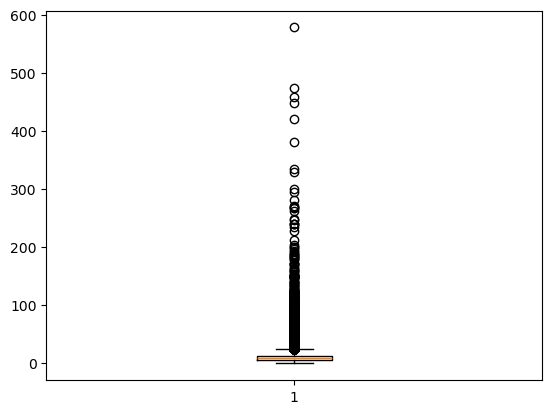

In [26]:
import matplotlib.pyplot as plt
plt.boxplot(df['fare_amount'])

In [27]:
for col in ['fare_amount','trip_distance','duration']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]


In [28]:
df

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,5.5,0.70,0 days 00:05:03
1,1.0,2.0,19.5,5.30,0 days 00:21:05
2,1.0,1.0,4.5,0.60,0 days 00:02:23
3,1.0,1.0,3.0,0.32,0 days 00:01:14
4,1.0,1.0,4.0,0.45,0 days 00:02:14
...,...,...,...,...,...
237987,1.0,1.0,3.5,0.48,0 days 00:01:13
237988,1.0,1.0,19.0,6.20,0 days 00:15:25
237989,2.0,2.0,6.5,0.85,0 days 00:06:45
237990,2.0,1.0,9.0,1.68,0 days 00:09:52
